In [117]:
import os
import numpy as np, pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [80]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


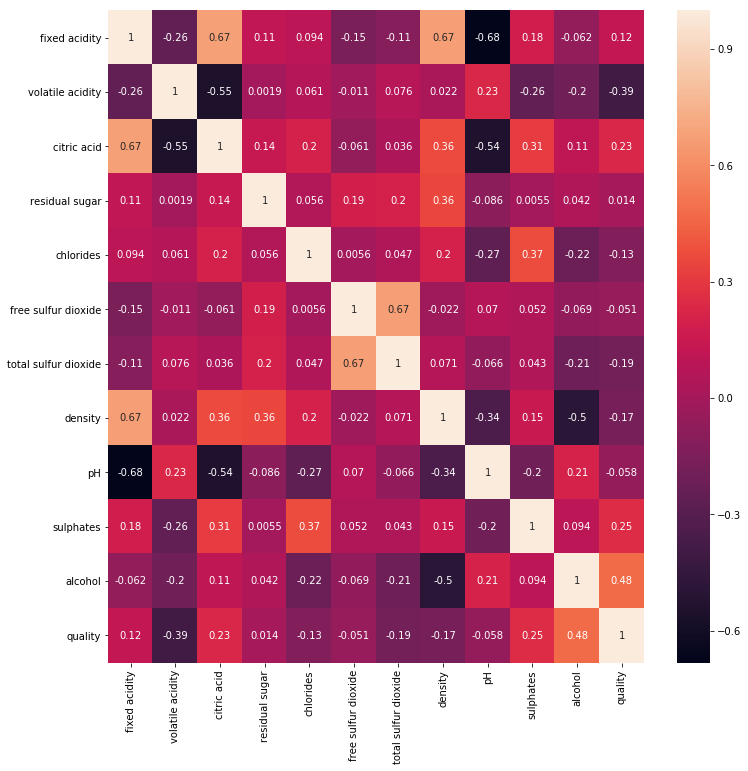

In [81]:
plt.figure(figsize=(12,12))
corrMatrix = df.corr()
sns.heatmap(corrMatrix,annot= True)
plt.show()

In [82]:
cor_target  = abs(corrMatrix['quality'])
relevant_features  = cor_target[cor_target > 0.1]
relevant_features.sort_values()

fixed acidity           0.124052
chlorides               0.128907
density                 0.174919
total sulfur dioxide    0.185100
citric acid             0.226373
sulphates               0.251397
volatile acidity        0.390558
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

In [83]:
to_drop = cor_target[cor_target<0.1]
to_drop

residual sugar         0.013732
free sulfur dioxide    0.050656
pH                     0.057731
Name: quality, dtype: float64

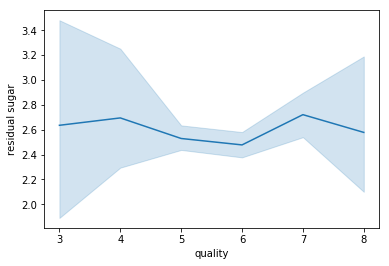

In [84]:
sns.lineplot(y = 'residual sugar', x = 'quality',data= df)

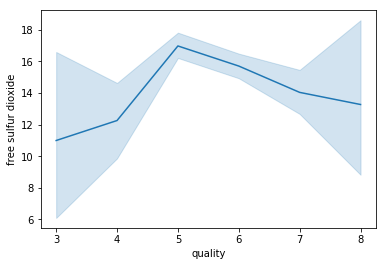

In [85]:
sns.lineplot(y = 'free sulfur dioxide', x = 'quality',data= df )

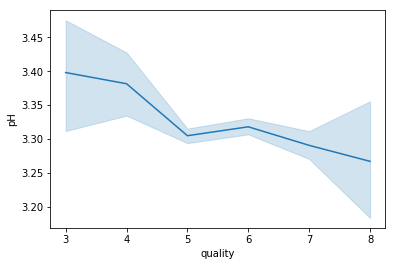

In [86]:
sns.lineplot(y = 'pH', x = 'quality',data= df )

* Residual sugar, free sulfur dioxide and pH variables are also features that we detect low correlation and will not use. 

In [87]:
to_drop_df = to_drop.to_frame()
to_drop_list = to_drop_df.index.tolist()

In [88]:
y = df['quality']
x = df.drop(to_drop_list, axis= 1).values
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
y = pd.cut(y, bins = bins, labels = group_names)
y_label = LabelEncoder()
y = y_label.fit_transform(y)

In [89]:
print(x.shape)
print(y.shape)

(1599, 9)
(1599,)


In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, stratify = y)

 #### lets apply before models :
1. KNN
2. NB
3. DT
4. RF

### KNN :

In [95]:
neigh = KNeighborsClassifier(n_jobs= -1)
parameters = {'n_neighbors': [3,10,80,90,100]}
clf = GridSearchCV(neigh,parameters, cv=5, scoring= 'roc_auc')
clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [3, 10, 80, 90, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [96]:
results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_n_neighbors'])
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.015973,0.021974,0.194428,0.157693,3,{'n_neighbors': 3},0.901357,0.901099,0.883710,0.928184,...,0.902856,0.014302,2,0.994901,0.994218,0.993921,0.993021,0.992845,0.993781,0.000764
1,0.003391,0.001018,0.110439,0.002286,10,{'n_neighbors': 10},0.927537,0.900776,0.954622,0.937750,...,0.924697,0.020636,1,0.966637,0.965335,0.967691,0.966381,0.963393,0.965887,0.001455
2,0.002981,0.001093,0.116141,0.009498,80,{'n_neighbors': 80},0.815643,0.752424,0.780543,0.814674,...,0.789727,0.023627,3,0.814838,0.820453,0.817161,0.818423,0.829032,0.819981,0.004878
3,0.003418,0.001034,0.149062,0.069718,90,{'n_neighbors': 90},0.824822,0.736070,0.758436,0.803038,...,0.777610,0.031986,4,0.791249,0.807131,0.813210,0.812998,0.811433,0.807204,0.008272
4,0.002649,0.001030,0.112450,0.001215,100,{'n_neighbors': 100},0.817970,0.733161,0.760375,0.796251,...,0.773081,0.030165,5,0.794752,0.799367,0.796315,0.801275,0.809935,0.800329,0.005316


In [97]:
train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
K =  results['param_n_neighbors']

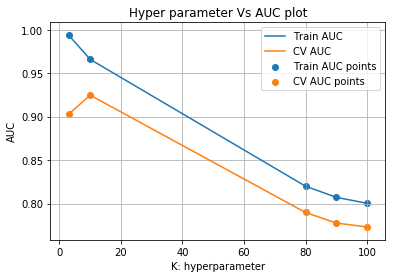

In [98]:
plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')
plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

* In above plot we can see that gap between Train and Test AUC curve is less at K = 10.

In [102]:
best_k = 10

In [104]:
pipeline_knn = Pipeline([('pca1',PCA(n_components=3)),
                        ('Knn_clf',KNeighborsClassifier(n_neighbors=10, n_jobs= -1))])

### Navie Bayes:

In [108]:
NB_clf = BernoulliNB()
parameters = {'alpha': [0.01,0.1,1,10]}
clf = GridSearchCV(NB_clf,parameters, cv=5, scoring= 'roc_auc')
clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.01, 0.1, 1, 10]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='roc_auc', verbose=0)

In [112]:
clf.best_params_

{'alpha': 0.01}

In [120]:
pipeline_NB = Pipeline([('pca2',PCA(n_components=3)),
                        ('NB_clf',BernoulliNB(alpha= 0.01))])

### Decision Tree :

In [121]:
pipeline_DT = Pipeline([('pca3',PCA(n_components=3)),
                        ('DT_clf',DecisionTreeClassifier())])

### Random Forest:

In [118]:
clf = RandomForestClassifier(n_jobs = -1,oob_score= True)
params = {'min_samples_split': [2, 5, 10, 15, 18],
          'n_estimators' : [5,10,20,30,50],}
clf_RF = GridSearchCV(clf,params,cv = 5)
clf_RF.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [2, 5, 10, 15, 18], 'n_estimators': [5, 10, 20, 30, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [119]:
clf_RF.best_params_

{'min_samples_split': 2, 'n_estimators': 10}

In [122]:
pipeline_RF = Pipeline([('pca3',PCA(n_components=3)),
                        ('RF_clf',RandomForestClassifier(min_samples_split= 2, n_estimators= 10))])

In [123]:
pipelines = [pipeline_knn,pipeline_NB,pipeline_DT,pipeline_RF]

In [124]:
best_accuracy = 0.0
best_classifier = 0
best_pipeline = ""

In [125]:
pipe_dict = {0: "KNN", 1 : "Navie Bayes", 2: "Decision Tree", 3: "Random Forest"}

for pipe in pipelines:
    pipe.fit(X_train,y_train)

In [127]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy : {}".format(pipe_dict[i], model.score(X_test,y_test)))

KNN Test Accuracy : 0.9125
Navie Bayes Test Accuracy : 0.865625
Decision Tree Test Accuracy : 0.90625
Random Forest Test Accuracy : 0.91875
